In [1]:
import numpy as np
import os
import cv2

In [2]:
def Myntra():
  import numpy as np
  import os
  import cv2
  !mkdir custom
  !mkdir custom/test
  #!mkdir custom/test_pairs.txt
  #!mkdir custom/t-p.txt
  !mkdir custom/test/cloth
  !mkdir custom/test/cloth-mask
  !mkdir custom/test/image
  !mkdir custom/test/image-mask
  !mkdir custom/test/image-parse
  !mkdir custom/test/image-parse-new
  !mkdir custom/test/pose
  img=cv2.imread('User1.jpg')
  img = cv2.resize(img,(192,256))
  print(img)
  cv2.imwrite ('custom/test/image/User1.jpg', img)

  #masking of user Image
  bgr = cv2.imread("custom/test/image/User1.jpg")
  gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
  _, roi = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)
  cont = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  output = np.zeros(gray.shape, dtype=np.uint8)
  cv2.drawContours(output, cont[0], -1, (255, 255, 255))
  cont = cont[0] if len(cont) == 2 else cont[1]
  cv2.fillPoly(output, cont, [255,255,255])
  cv2.imwrite('custom/test/image-mask/User1.png',output)

  img1=cv2.imread('user1_shirt.jpeg')
  img1 = cv2.resize(img1,(192,256))
  cv2.imwrite ('custom/test/cloth/user1_shirt.jpeg', img1)

  save_path='/custom'
  file_name1='/test_pairs.txt'
  file_name2='/t-p.txt'
  completeName1=os.path.join(save_path,file_name1)
  print(completeName1)
  file1=open('custom/test_pairs.txt',"w")
  file1.write('User1.jpg')
  file1.close()

  !pip install Tensorflow==1.13.1
  !pip install torch==1.3.0
  !pip install torchvision==0.2.1

  # Original Checkpoints Link: https://drive.google.com/file/d/1BFVXgeln-bek8TCbRjN6utPAgRE0LJZg/view?usp=sharing
  !gdown --id 1BFVXgeln-bek8TCbRjN6utPAgRE0LJZg
  !unzip -qq JPPNet-s2.zip -d checkpoint

  !unzip -qq kaffe.zip
  !unzip -qq utils.zip

  import fileinput

  with fileinput.FileInput("evaluate_pose_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("scipy.misc", "imageio"), end='')
  with fileinput.FileInput("evaluate_pose_JPPNet_s2.py", inplace=True, backup='.bak') as file:       
      for line in file:
          print(line.replace("xrange", "range"), end='')
  with fileinput.FileInput("evaluate_pose_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("./datasets/examples", "/content/custom/test/image"), end='')
  with fileinput.FileInput("evaluate_pose_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("./datasets/examples/list/val.txt", "/content/custom/test_pairs.txt"), end='')
  with fileinput.FileInput("evaluate_pose_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("NUM_STEPS = 6", "NUM_STEPS = 1"), end='')


  !python evaluate_pose_JPPNet_s2.py

  import cv2
  import matplotlib.pyplot as plt
  from google.colab.patches import cv2_imshow
  with open('output/pose/val/User1.txt','r') as file:
    arr=[int(a) for a in file.readline().split(' ') if a!='']
  image=cv2.imread('custom/test/image/User1.jpg')
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #cv2_imshow(image)
  #print(arr)
  #print(len(arr))
  c=0
  for i in range(0,len(arr),2):
    c=c+1
    #print(arr[i],arr[i+1])
    cv2.putText(img, str(c), (arr[i],arr[i+1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0),2, cv2.LINE_AA, False)
  plt.axis('off')
  plt.subplot(1, 2, 1) 
  plt.imshow(img)
  plt.title('POSE ESTIMATION RESULTS')


  x=[arr[16]/2+arr[18]/2,arr[16],arr[24],arr[22],arr[20],arr[26],arr[28],arr[30],arr[4],arr[2],0,arr[6],0,0,arr[16],arr[18]/2+arr[26]/2,arr[24]/2+arr[16]/2,arr[6]/2+arr[26]/2]
  #print(x)
  y=[arr[17]/4+arr[19]*0.75,arr[17]/2+arr[15]/2,arr[25],arr[23],arr[21],arr[27],arr[29],arr[31],arr[5],arr[3],0,arr[7],0,0,arr[17]/4+arr[19]*0.75,arr[17]/4+arr[19]*0.75,arr[17]/4+arr[19]*0.75,arr[19]/2+arr[17]/2]
  #print(y)
  z=[]
  for i in range(len(x)):
    z.append(x[i])
    z.append(y[i])
    z.append(1)


  import cv2
  from google.colab.patches import cv2_imshow
  #arr= [int(a) for a in d['people'][0]['pose_keypoints']]

  image=cv2.imread('/content/custom/test/image/User1.jpg')
  #cv2_imshow(image)
  #print(arr)
  c=0
  k=[int(i) for i in z]
  for i in range(0,len(k),3):  
    c=c+1
    #print(k[i],k[i+1])
    cv2.putText(image, str(c), (k[i],k[i+1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255),1, cv2.LINE_AA, False)
  cv2_imshow(image)



  save_path='/custom'
  file_name2='t-p.txt'
  completeName2=os.path.join(save_path,file_name2)
  file2=open('custom/t-p.txt',"w")
  file2.write('User1.jpg ')
  file2.write('user1_shirt.jpeg')
  file2.close()


  dict={"version": 1.0,"people": [{"face_keypoints": [],"pose_keypoints": z,"hand_right_keypoints": [],"hand_left_keypoints": []}]}

  import json
  with open("./custom/test/pose/User1_keypoints.json", "w") as outfile: 
      json.dump(dict, outfile)


  with fileinput.FileInput("evaluate_parsing_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("./datasets/examples", "/content/custom/test/image"), end='')
  with fileinput.FileInput("evaluate_parsing_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("./datasets/examples/list/val.txt", "/content/custom/test_pairs.txt"), end='')
  with fileinput.FileInput("evaluate_parsing_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("NUM_STEPS = 6", "NUM_STEPS = 1"), end='')
  with fileinput.FileInput("evaluate_parsing_JPPNet_s2.py", inplace=True, backup='.bak') as file:
      for line in file:
          print(line.replace("./output/parsing/val", "/content/custom/test/image-parse"), end='')


  !python evaluate_parsing_JPPNet_s2.py



  parse=cv2.imread('/content/custom/test/image-parse/User1.png')
  im = cv2.cvtColor(parse, cv2.COLOR_BGR2RGB)
  plt.axis('off') 
  plt.imshow(im)
  plt.title('HUMAN PARSING RESULTS')

  !gdown --id "1ks-y-vrCvuiMMZfacAb0Ryj2tU_EKG4o"

  !unzip /content/CP-VTON+.zip

  !gdown --id "1LhaYd4iX_aAH85-34mTuVf45kq6IvZFA"

  !unzip /content/viton_plus.zip

  !pip install -r requirements.txt

  imx = cv2.imread("custom/test/image/User1.jpg")
  print(len(imx),len(imx[0]))

  bgr = cv2.imread("custom/test/cloth/user1_shirt.jpeg")
  print(len(bgr),len(bgr[0]))
  gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
  _, roi = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)
  cont = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  output = np.zeros(gray.shape, dtype=np.uint8)
  cv2.drawContours(output, cont[0], -1, (255, 255, 255))
  cont = cont[0] if len(cont) == 2 else cont[1]
  cv2.fillPoly(output, cont, [255,255,255])
  cv2.imwrite('custom/test/cloth-mask/user1_shirt.jpeg',output)

  !python test.py --name GMM --stage GMM --workers 4 --datamode test --data_list t-p.txt --checkpoint CP-VTON+/checkpoints/GMM/gmm_final.pth

  wc=cv2.imread('/content/custom/test/GMM/test/warp-cloth/User1.jpg')
  wc1 = cv2.cvtColor(wc, cv2.COLOR_BGR2RGB)
  plt.axis('off')
  plt.imshow(wc1)
  plt.title('                                    WARPED CLOTH')


  !python test.py --name TOM --stage TOM --workers 4 --datamode test --data_list t-p.txt --checkpoint CP-VTON+/checkpoints/TOM/tom_final.pth

  wp=cv2.imread('./custom/test/TOM/test/try-on/User1.jpg')
  wp1 = cv2.cvtColor(wp, cv2.COLOR_BGR2RGB)
  plt.axis('off')
  plt.imshow(wp1)
  plt.title('                                           TRY-ON RESULTS')

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 251 251]
  [253 251 251]
  [252 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 251 251]
  [253 251 251]
  [252 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 251 251]
  [253 251 251]
  [253 251 251]]

 ...

 [[248 246 246]
  [249 247 247]
  [251 249 249]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 248 248]
  [250 248 248]
  [251 249 249]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 248 248]
  [250 248 248]
  [251 249 249]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
/test_pairs.txt
     |████████████████████████████████| 92.6 MB 49 kB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 3.2 MB 54.3 MB/s 
     |████████████████████████████████| 367 kB 73.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling ten

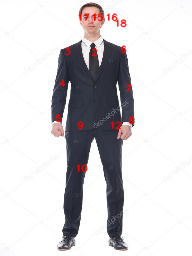

Streaming output truncated to the last 5000 lines.
  inflating: viton_plus/train/pose/012704_0_keypoints.json  
  inflating: viton_plus/train/pose/012705_0_keypoints.json  
  inflating: viton_plus/train/pose/012706_0_keypoints.json  
  inflating: viton_plus/train/pose/012707_0_keypoints.json  
  inflating: viton_plus/train/pose/012709_0_keypoints.json  
  inflating: viton_plus/train/pose/012710_0_keypoints.json  
  inflating: viton_plus/train/pose/012714_0_keypoints.json  
  inflating: viton_plus/train/pose/012715_0_keypoints.json  
  inflating: viton_plus/train/pose/012717_0_keypoints.json  
  inflating: viton_plus/train/pose/012718_0_keypoints.json  
  inflating: viton_plus/train/pose/012721_0_keypoints.json  
  inflating: viton_plus/train/pose/012722_0_keypoints.json  
  inflating: viton_plus/train/pose/012724_0_keypoints.json  
  inflating: viton_plus/train/pose/012726_0_keypoints.json  
  inflating: viton_plus/train/pose/012727_0_keypoints.json  
  inflating: viton_plus/train/pose

error: ignored

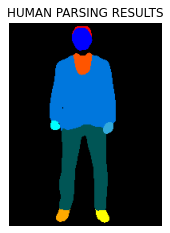

In [3]:
Myntra()

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'User image')

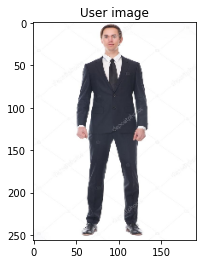

In [7]:
img=cv2.imread('User1.jpg')
img = cv2.resize(img,(192,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("User image")